<a href="https://colab.research.google.com/github/Vanitharams/loan-prediction/blob/main/loan%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
test = pd.read_csv(r'/test_dataset.csv')

In [6]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [8]:
train=pd.read_csv(r'/train_dataset.csv')

In [9]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [ ]:
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].median())

In [17]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])

In [19]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])

In [20]:
train['Married']=train['Married'].fillna(train['Married'].mode()[0])

In [21]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [22]:
train.groupby("Gender")["Loan_Status"].value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.691235
        N              0.308765
Name: Loan_Status, dtype: float64

In [23]:
train.groupby("Gender")["Loan_Status"].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

In [24]:
train.drop(['Loan_ID'],axis=1,inplace=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

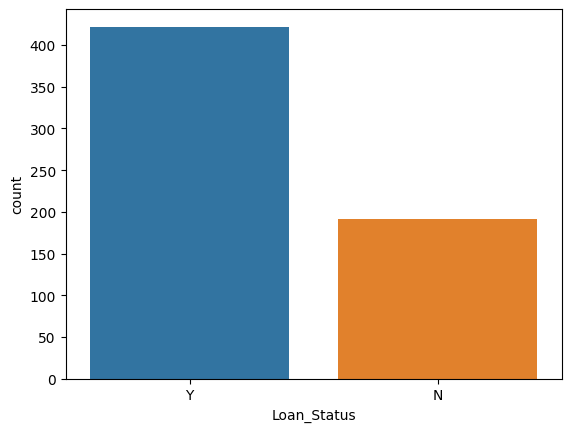

In [25]:
sns.countplot(data=train,x='Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

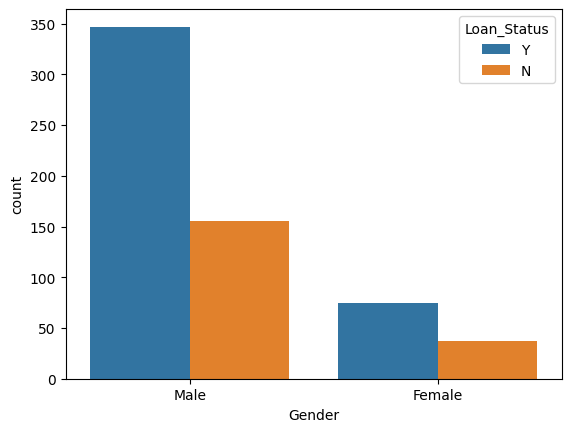

In [27]:
sns.countplot(data=train["Loan_Status"],x=train["Gender"],hue=train["Loan_Status"])

<Axes: xlabel='Married', ylabel='count'>

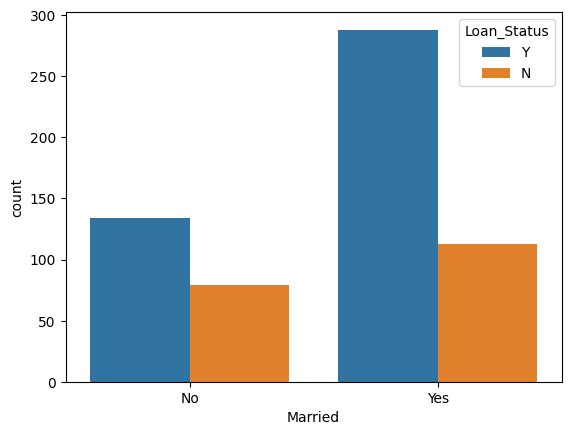

In [28]:
sns.countplot(data=train["Loan_Status"],x=train["Married"],hue=train["Loan_Status"])

<Axes: xlabel='Dependents', ylabel='count'>

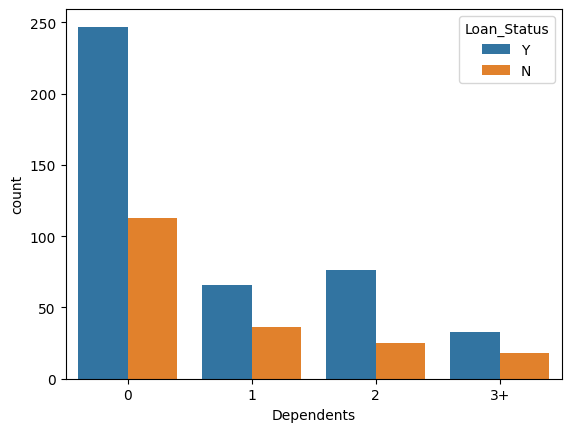

In [29]:
sns.countplot(data=train["Loan_Status"],x=train["Dependents"],hue=train["Loan_Status"])

<Axes: xlabel='Education', ylabel='count'>

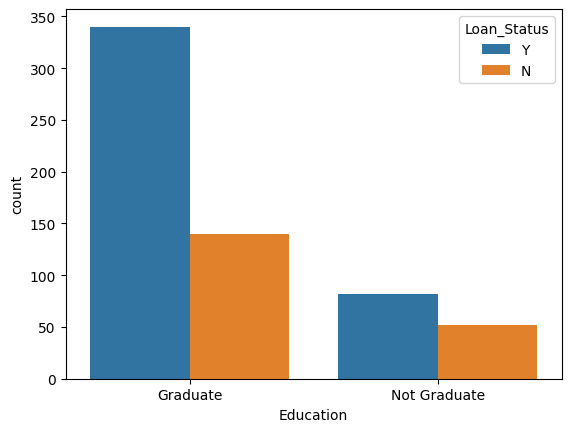

In [30]:

sns.countplot(data=train["Loan_Status"],x=train["Education"],hue=train["Loan_Status"])

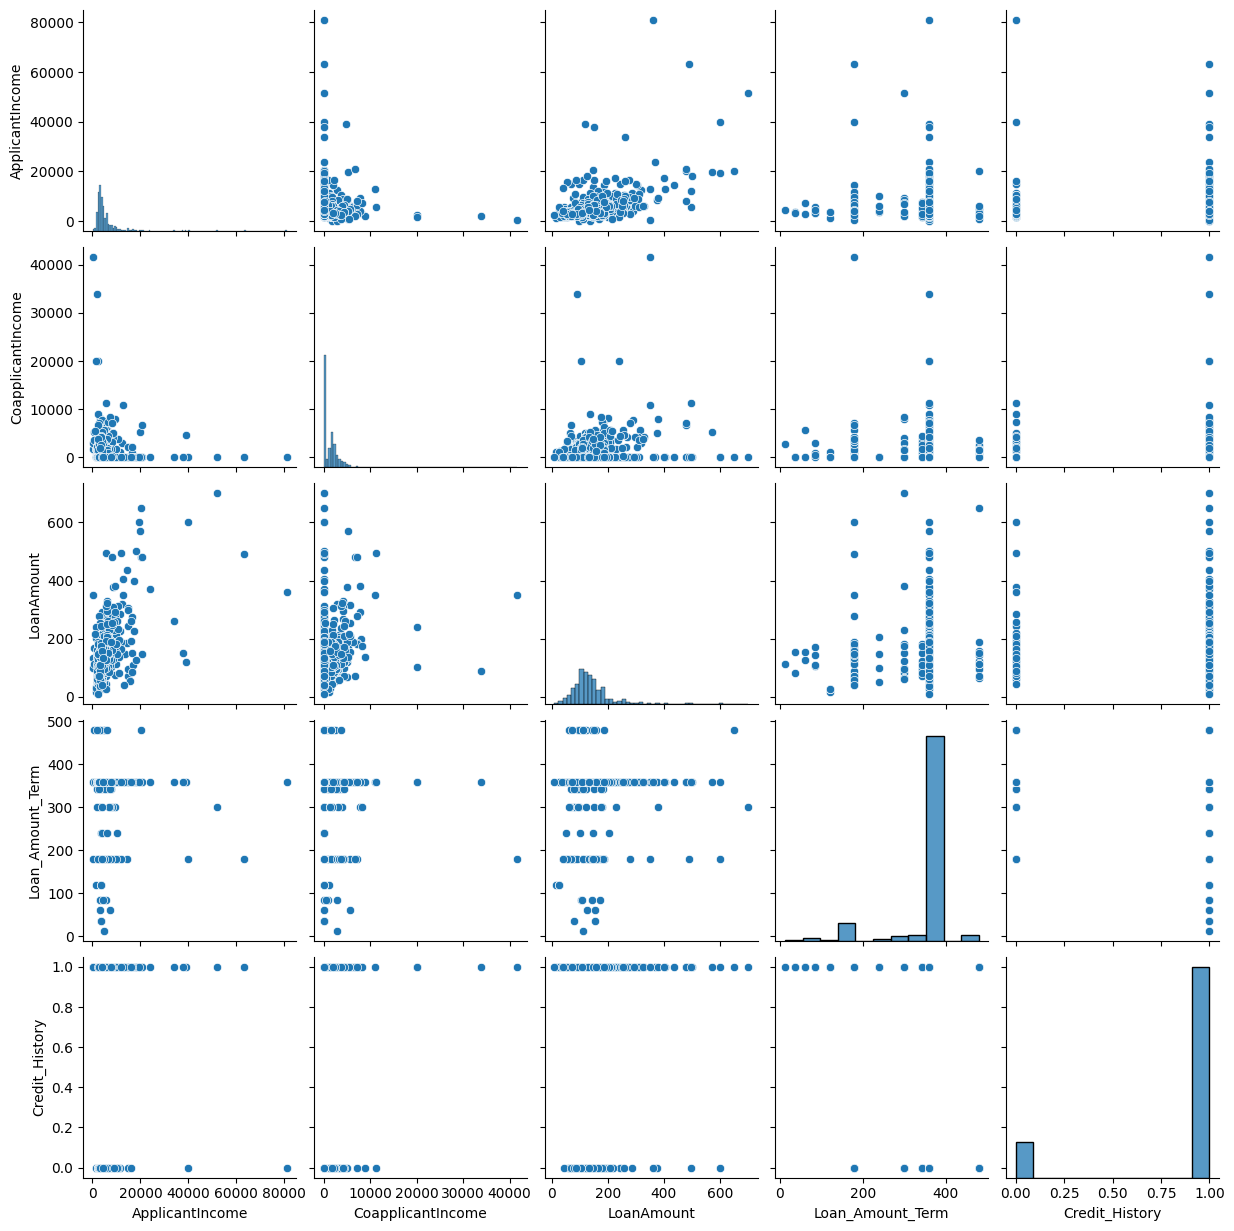

In [31]:
sns.pairplot(train)

In [32]:
Y=train.Loan_Status

In [33]:
Y=np.where(Y=="Y",1,0)

In [34]:
X=pd.get_dummies(train.drop("Loan_Status",axis=1),drop_first=True)

In [35]:
col_names=X.columns

In [36]:
scaler=StandardScaler()

In [37]:
scaler.fit(X)

StandardScaler()

In [38]:
X_scaled=scaler.transform(X)

In [39]:
X=pd.DataFrame(X_scaled,columns=col_names)

In [40]:
X.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,0.000000,0.279851,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.219273,0.279851,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.957641,0.279851,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.314547,0.279851,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.064454,0.279851,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
5,0.002218,0.880600,1.436099,0.279851,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,2.547117,-0.782016,1.428147
6,-0.503019,-0.035995,-0.612275,0.279851,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
7,-0.387850,0.301914,0.138001,0.279851,-2.428760,0.472343,0.728816,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,1.278747,-0.700208
8,-0.228939,-0.032575,0.257093,0.279851,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
9,1.218457,3.196713,2.412650,0.279851,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,1.278747,-0.700208


In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [42]:
models=[]

In [43]:
models.append(('Logistic Regression',LogisticRegression()))

In [44]:
models.append(('K Nearest Neighbors',KNeighborsClassifier()))

In [45]:
models.append(('Decision Tree',DecisionTreeClassifier()))

In [46]:
models.append(('Gaussian Naive Bayes',GaussianNB()))

In [47]:
models.append(('Random Forest',RandomForestClassifier()))

In [48]:
for name,algorithm in models:
    model=algorithm
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    print('The Accuracy of the %s is %f:'%(name,accuracy_score(prediction,Y_test)))
print('\n')

The Accuracy of the Logistic Regression is 0.837398:
The Accuracy of the K Nearest Neighbors is 0.739837:
The Accuracy of the Decision Tree is 0.707317:
The Accuracy of the Gaussian Naive Bayes is 0.829268:
The Accuracy of the Random Forest is 0.813008:


